## Regression Week 4: Ridge Regression Assignment 1

In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

- Use a pre-built implementation of regression to run polynomial regression
- Use matplotlib to visualize polynomial regressions
- Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
- Use matplotlib to visualize polynomial regressions under L2 regularization
- Choose best L2 penalty using cross-validation.
- Assess the final fit using test data.

In [28]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
train=pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_train_data.csv',dtype=dtype_dict)

In [4]:
train=train.sort(['sqft_living','price'])

/Users/fengxiao/anaconda/envs/WU_ML/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature.apply(lambda x:x**power)
    return poly_dataframe

In [9]:
polynomial_dataframe(train['sqft_living'],15).head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
8840,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
6982,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
8338,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
2228,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
9631,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [12]:
l2_small_penalty = 1.5e-5

In [24]:
def polynomial_regression(features, deg, y):
    poly15_data = polynomial_dataframe(features, 15) # use equivalent of `polynomial_sframe`
    model = linear_model.Ridge(alpha=l2_small_penalty,normalize=True)
    model.fit(poly15_data,y)
    return model

In [25]:
polynomial_regression(train['sqft_living'],15,train['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [19]:
model.coef_

array([  1.39848350e+02,  -3.80136504e-02,   2.09128518e-05,
        -7.37482644e-10,  -1.78926077e-13,  -2.75231014e-18,
         7.72218148e-22,   8.35407120e-26,   4.65969521e-30,
         9.95679162e-35,  -1.11655273e-38,  -1.75008085e-42,
        -1.46366162e-46,  -7.79342734e-51,  -3.73777072e-56])

4. Quiz Question: What’s the learned value for the coefficient of feature power_1?

## Observe Overfitting

Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

In [20]:
set_1 = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)

In [21]:
set_2 = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)

In [22]:
set_3 = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)

In [23]:
set_4 = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [26]:
l2_small_penalty = 1e-9

In [93]:
poly_1=polynomial_dataframe(set_1['sqft_living'],15)
poly_1['price']=set_1['price']

In [94]:
polynomial_regression(set_1['sqft_living'],15,set_1['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [95]:
def plot_data(feature,y):    
    plt.plot(feature,y,'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(poly_1['power_1'],poly_1['price'],'.',poly_1['power_1'],model.predict())

TypeError: predict() takes exactly 2 arguments (1 given)

In [96]:
x1=DataFrame(poly_1,columns=['power_15'])

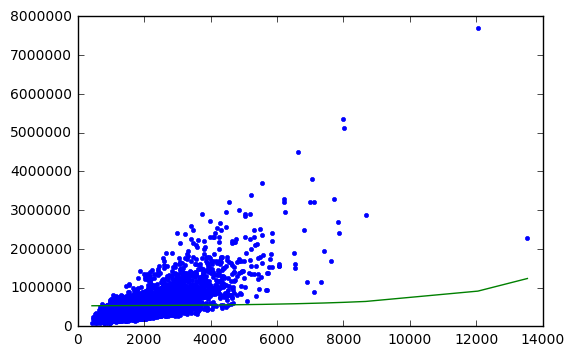

In [97]:
plt.plot(poly_1['power_1'],poly_1['price'],'.',poly_1['power_1'], model.predict(polynomial_dataframe(set_1['sqft_living'], 15)),'-')

In [65]:
poly_2=polynomial_dataframe(set_2['sqft_living'],15)
poly_2['price']=set_2['price']

In [66]:
polynomial_regression(set_2['sqft_living'],15,set_2['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [67]:
model.coef_

array([  1.39848350e+02,  -3.80136504e-02,   2.09128518e-05,
        -7.37482644e-10,  -1.78926077e-13,  -2.75231014e-18,
         7.72218148e-22,   8.35407120e-26,   4.65969521e-30,
         9.95679162e-35,  -1.11655273e-38,  -1.75008085e-42,
        -1.46366162e-46,  -7.79342734e-51,  -3.73777072e-56])

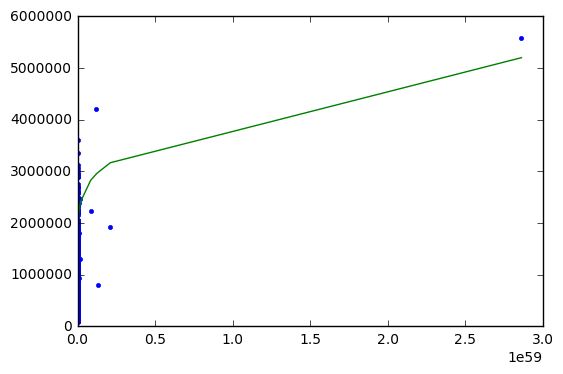

In [60]:
plt.plot(poly_2['power_15'],poly_2['price'],'.',poly_2['power_15'], model.predict(polynomial_dataframe(set_2['sqft_living'], 15)),'-')

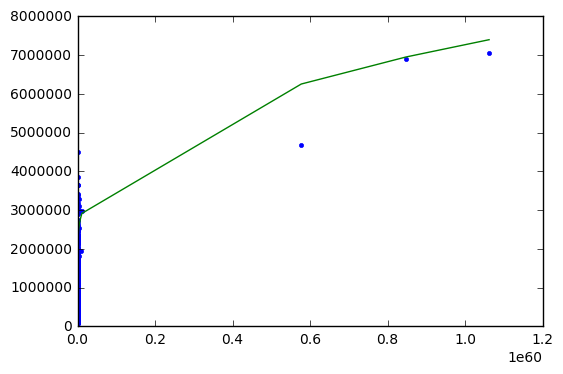

In [63]:
poly_3=polynomial_dataframe(set_3['sqft_living'],15)
poly_3['price']=set_3['price']
polynomial_regression(set_3['sqft_living'],15,set_3['price'])
plt.plot(poly_3['power_15'],poly_3['price'],'.',poly_3['power_15'], model.predict(polynomial_dataframe(set_3['sqft_living'], 15)),'-')

In [68]:
polynomial_regression(set_3['sqft_living'],15,set_3['price']).coef_

array([ -7.55395860e+02,   9.75579426e-01,  -4.58945946e-04,
         7.77957970e-08,   7.15013475e-12,  -2.88601967e-15,
        -2.13678244e-20,   3.38085204e-23,   2.19178227e-27,
        -1.97067782e-31,  -4.15993171e-35,  -1.80196120e-39,
         3.19071029e-43,   5.08457018e-47,  -3.93304288e-51])

In [69]:
polynomial_regression(set_2['sqft_living'],15,set_2['price']).coef_

array([  8.59362657e+02,  -8.18118283e-01,   4.28879983e-04,
        -9.12770642e-08,  -2.69604558e-12,   3.73980369e-15,
        -1.42712066e-19,  -6.30794440e-23,  -1.44559712e-27,
         7.44321123e-31,   9.25866062e-35,   3.28017081e-41,
        -1.29543497e-42,  -1.38781289e-46,   1.66546460e-50])

In [70]:
polynomial_regression(set_1['sqft_living'],15,set_1['price']).coef_

array([  5.44669376e+02,  -3.55447581e-01,   1.22446369e-04,
        -1.17175283e-08,  -3.90512803e-13,  -1.39076198e-17,
         1.47860292e-20,   6.87492181e-25,  -7.57204215e-29,
        -1.04097316e-32,  -3.71844154e-37,   3.39989468e-41,
         5.56591947e-45,   2.53761424e-49,  -3.35152933e-53])

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. Make sure to add "alpha=l2_large_penalty" and "normalize=True" to the parameter list, where the value of l2_large_penalty is given by l2_large_penalty=1.23e2

In [72]:
l2_small_penalty =1.23e2

In [73]:
polynomial_regression(set_1['sqft_living'],15,set_1['price']).coef_

array([  2.32806803e+00,   3.53621608e-04,   3.31969692e-08,
         2.00082477e-12,   1.11492559e-16,   6.57786122e-21,
         4.12939525e-25,   2.70393755e-29,   1.81614763e-33,
         1.23824277e-37,   8.51872481e-42,   5.89455598e-46,
         4.09542560e-50,   2.85464889e-54,   1.99547476e-58])

In [74]:
polynomial_regression(set_2['sqft_living'],15,set_2['price']).coef_

array([  2.09756903e+00,   3.90817483e-04,   6.67189944e-08,
         8.90002997e-12,   9.72639877e-16,   9.69733682e-20,
         9.50564475e-24,   9.44491031e-28,   9.57191338e-32,
         9.86945155e-36,   1.03101115e-39,   1.08729784e-43,
         1.15453748e-47,   1.23211305e-51,   1.31986696e-55])

In [75]:
polynomial_regression(set_3['sqft_living'],15,set_3['price']).coef_

array([  2.28906258e+00,   4.12472190e-04,   6.08835345e-08,
         6.58572163e-12,   6.15278155e-16,   5.64446634e-20,
         5.28834396e-24,   5.07091402e-28,   4.94657273e-32,
         4.88043809e-36,   4.85009106e-40,   4.84161534e-44,
         4.84635021e-48,   4.85883628e-52,   4.87558469e-56])

## Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

In [76]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)

In [77]:
test = pd.read_csv(r'/Users/fengxiao/Documents/Coursera HM/Coursera_homework/WU Linear Regression/week3/wk3_kc_house_test_data.csv', dtype=dtype_dict)

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [78]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


let us familiarize ourselves with array slicing with Pandas. To extract a continuous slice from a DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [79]:
train_valid_shuffled[0:10] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

- Compute starting and ending indices of segment i and call 'start' and 'end'
- Form validation set by taking a slice (start:end+1) from the data.
- Form training set by appending slice (end+1:n) to the end of slice (0:start).
- Train a linear model using training set just formed, with a given l2_penalty
- Compute validation error (RSS) using validation set just formed


In [169]:
def k_fold_cross_validation(k, l2_penalty, data, d):
    n=len(data)
    RSS=0
    for i in range(k):
        start=n*i/k
        end=n*(i+1)/k-1
        valid_i=data[start:end+1]
        train_i=data[0:start].append(data[end+1:n])
        lr = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        x=polynomial_dataframe(train_i['sqft_living'],d)
        y=train_i['price']
        model=lr.fit(x,y)
        valid_x=polynomial_dataframe(valid_i['sqft_living'],d)
        predict_i=model.predict(valid_x)
        RSS+=((valid_i['price']-predict_i)**2).sum()
    mrss=RSS/k
    
    return mrss

In [171]:
lams = np.logspace(-4, 7, num=13)

In [172]:
lams

array([  1.00000000e-04,   8.25404185e-04,   6.81292069e-03,
         5.62341325e-02,   4.64158883e-01,   3.83118685e+00,
         3.16227766e+01,   2.61015722e+02,   2.15443469e+03,
         1.77827941e+04,   1.46779927e+05,   1.21152766e+06,
         1.00000000e+07])

In [173]:
for l in lams:
    print l, k_fold_cross_validation(10, l,train_valid_shuffled, 15)

0.0001 7.59154167156e+14
0.000825404185268 4.11825187075e+14
0.00681292069058 1.49637290586e+14
0.056234132519 1.19847486128e+14
0.464158883361 1.23273130258e+14
3.83118684956 1.82234431887e+14
31.6227766017 2.46444287682e+14
261.015721568 2.62255493387e+14
2154.43469003 2.6553604572e+14
17782.7941004 2.6597152043e+14
146779.926762 2.66024890301e+14
1211527.65863 2.66031365276e+14
10000000.0 2.66032149871e+14
